# Import Library

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [261]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [262]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Things to do:

- Split training and unseen data (test data)
- Drop duplicated data
- Drop customerID
- PreferredLoginDevice: merubah category "Mobile Phone" menjadi "Phone"
- PreferredPaymentMode: merubah category CC menjadi Credit Card dan COD menjadi Cash on Delivery
- Handle missing value
- Prevent multicolinearity : drop CouponUsed
- Boxcox transform: Tenure, WarehouseToHome, DaySinceLastOrder
- Handle outlier menggunakan Z-score

In [263]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Handle duplicated data

In [264]:
df.duplicated().any()

False

# Drop unused columns and target column

In [265]:
df.drop('CustomerID', axis = 1, inplace = True)

In [266]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

# Splitting Data

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Change miscategorize value

In [268]:
X_train['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
X_train['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace = True)

X_test['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
X_test['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace = True)

In [269]:
cat = []
num = []

for col in X_train.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

# Handle Missing Value

In [270]:
for col in cat:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in num:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [271]:
for col in cat:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

for col in num:
    X_test[col] = X_test[col].fillna(X_test[col].median())

In [272]:
X_train.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [273]:
X_test.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [274]:
X_train = X_train.drop('CouponUsed', axis = 1)
X_test = X_test.drop('CouponUsed', axis = 1)

In [275]:
cat = []
num = []

for col in X_train.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [276]:
num

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [277]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

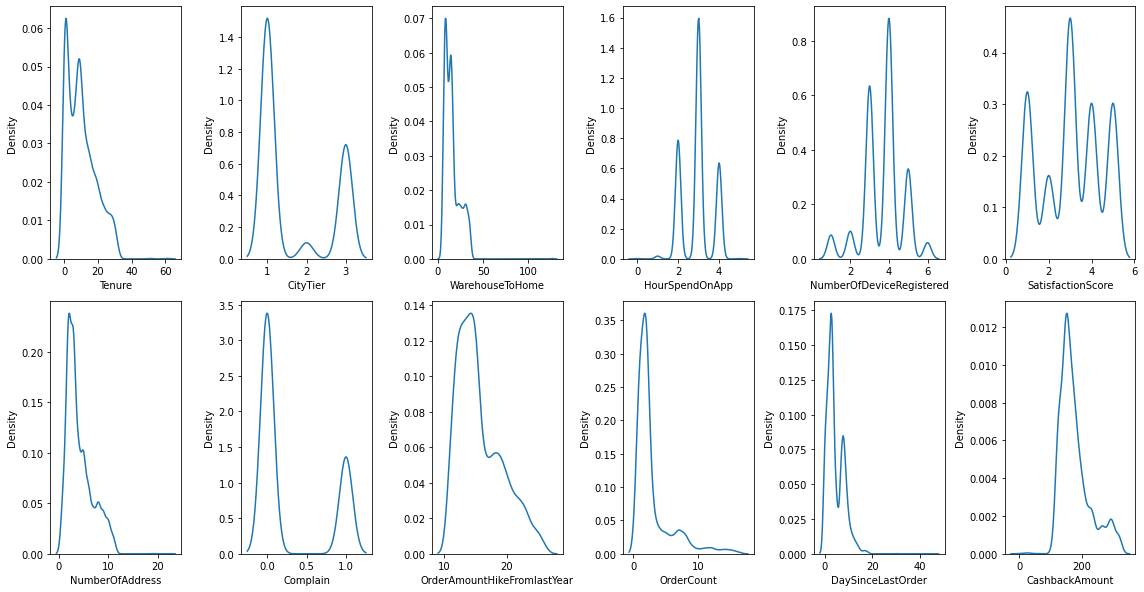

In [278]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

In [279]:
X_train.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

# Remove Outliers

Dengan memakai Z-Score kita akan menghilangkan data-data yang terdeteksi sebagai outlier

In [280]:
outlier = num.copy()
outlier.remove('CityTier')
outlier.remove('Complain')

In [281]:
print(f'Jumlah baris sebelum memfilter outlier: {len(X_train)}')
print(f'Jumlah baris sebelum memfilter outlier: {len(X_test)}')

filtered_entries = np.array([True] * len(X_train))

for col in outlier:
    zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
filtered_entries_test = np.array([True] * len(X_test))

for col in outlier:
    zscore = abs(stats.zscore(X_test[col])) # hitung absolute z-scorenya
    filtered_entries_test = (zscore < 3) & filtered_entries_test # keep yang kurang dari 3 absolute z-scorenya

X_train = X_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3
X_test = X_test[filtered_entries_test]

print(f'Jumlah baris setelah memfilter outlier: {len(X_train)}')
print(f'Jumlah baris setelah memfilter outlier: {len(X_test)}')

Jumlah baris sebelum memfilter outlier: 4504
Jumlah baris sebelum memfilter outlier: 1126
Jumlah baris setelah memfilter outlier: 4329
Jumlah baris setelah memfilter outlier: 1078


# Feature Transformation

disini kita akan menggunakan boxcox, log, square root, dan cube root untuk mentransformasi kolom yang mempunyai distribusi right skewed sehingga mendekati distribusi normal

In [282]:
log_col = outlier.copy()
log_col.remove('CashbackAmount')

In [283]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

In [284]:
X_train_transform.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,9.830215,1.658813,15.556711,2.935782,3.680065,3.052437,4.182259,0.288981,15.681682,2.630169,4.238623,174.665161
std,8.221970,0.916206,8.078381,0.700565,1.021702,1.376551,2.550198,0.453342,3.585610,2.169935,3.276693,46.416563
min,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,37.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,2.000000,145.340000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,2.000000,3.000000,161.920000
75%,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,3.000000,7.000000,191.520000
max,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,11.000000,15.000000,324.430000


In [285]:
X_train_transform

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
4478,1.0,Phone,1,12.0,Debit Card,Female,3.0,4,Mobile Phone,4,Single,3,1,13.0,2.0,3.0,149.78
3685,17.0,Phone,1,13.0,Credit Card,Female,4.0,5,Laptop & Accessory,3,Single,3,1,15.0,2.0,9.0,165.81
731,0.0,Phone,1,9.0,Debit Card,Male,3.0,4,Mobile,3,Single,2,0,12.0,1.0,2.0,130.33
291,9.0,Computer,1,8.0,Debit Card,Male,2.0,3,Mobile Phone,2,Divorced,2,1,23.0,1.0,0.0,117.02
184,4.0,Phone,1,11.0,Cash on Delivery,Male,2.0,3,Mobile Phone,2,Divorced,1,1,12.0,1.0,3.0,148.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,Phone,1,27.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Single,2,0,15.0,2.0,3.0,147.72
5191,10.0,Phone,3,16.0,E wallet,Male,3.0,4,Fashion,1,Married,6,0,12.0,5.0,3.0,225.96
5226,7.0,Phone,1,11.0,Credit Card,Female,3.0,5,Mobile Phone,4,Married,10,0,12.0,2.0,3.0,163.38
5390,1.0,Phone,1,36.0,Credit Card,Male,4.0,4,Mobile Phone,5,Married,3,0,14.0,2.0,3.0,164.07


In [286]:
X_train_transform[log_col].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,9.830215,15.556711,2.935782,3.680065,3.052437,4.182259,15.681682,2.630169,4.238623
std,8.221970,8.078381,0.700565,1.021702,1.376551,2.550198,3.585610,2.169935,3.276693
min,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,0.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,2.000000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,2.000000,3.000000
75%,15.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,3.000000,7.000000
max,31.000000,36.000000,5.000000,6.000000,5.000000,11.000000,26.000000,11.000000,15.000000


In [287]:
 X_train_transform.loc[X_train_transform['Tenure'] != 0]['Tenure'].min()/2

0.5

In [288]:
for col in log_col:
    X_train_transform.loc[X_train_transform[col] == 0, col] =  X_train_transform.loc[X_train_transform[col] != 0][col].min()/2

In [289]:
X_train_transform.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,9.876761,1.658813,15.556711,2.935782,3.680065,3.052437,4.182259,0.288981,15.681682,2.630169,4.284708,174.665161
std,8.167409,0.916206,8.078381,0.700565,1.021702,1.376551,2.550198,0.453342,3.585610,2.169935,3.219764,46.416563
min,0.500000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.500000,37.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,2.000000,145.340000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,2.000000,3.000000,161.920000
75%,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,3.000000,7.000000,191.520000
max,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,11.000000,15.000000,324.430000


## Boxcox Transformation

In [290]:
for col in log_col:
    X_train_transform[col] = stats.boxcox(X_train_transform[col])[0]

### Before Transformation

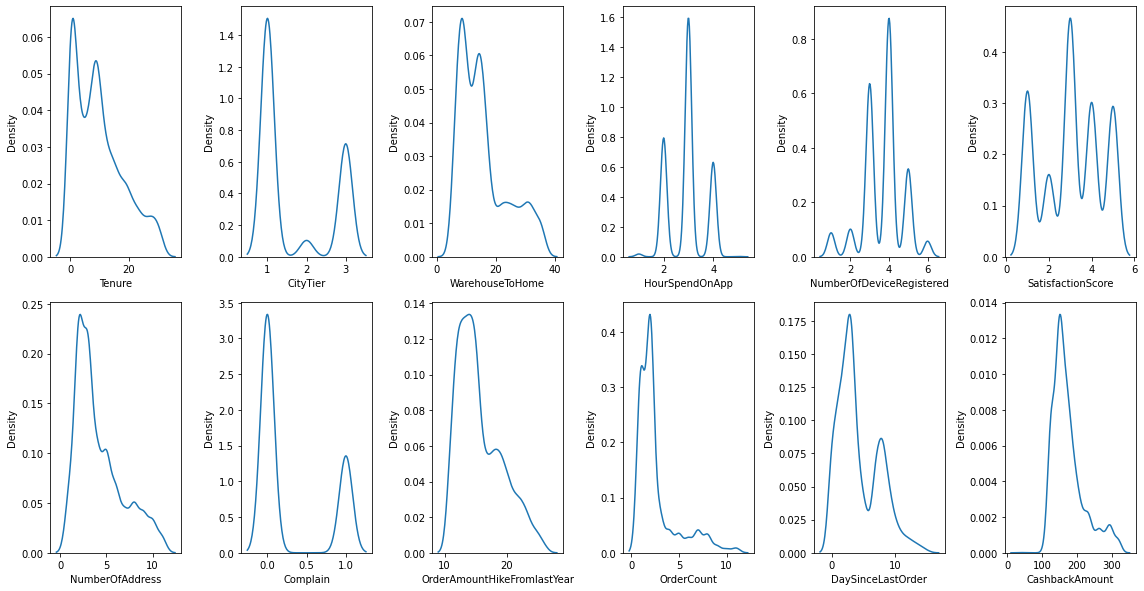

In [291]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

### After transformation

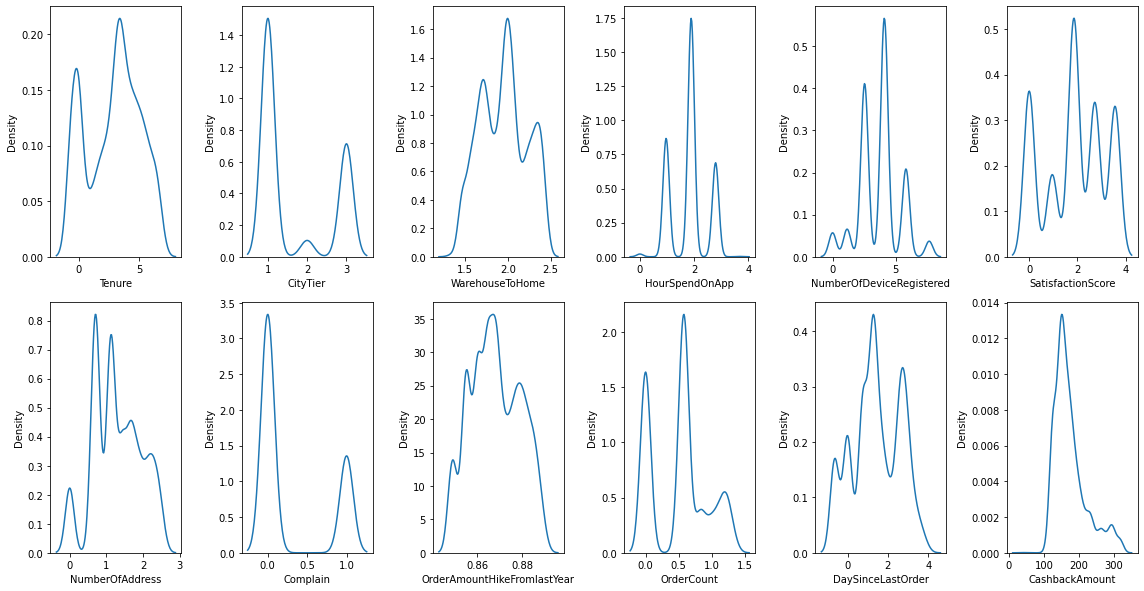

In [292]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_transform[num[i]])
    plt.tight_layout()

## Log Transformation

In [293]:
X_train_log = X_train.copy()

In [294]:
for col in log_col:
    X_train_log.loc[X_train_log[col] == 0, col] =  X_train_log.loc[X_train_log[col] != 0][col].min()/2

In [295]:
for col in log_col:
    X_train_log[col] = np.log(X_train_log[col])

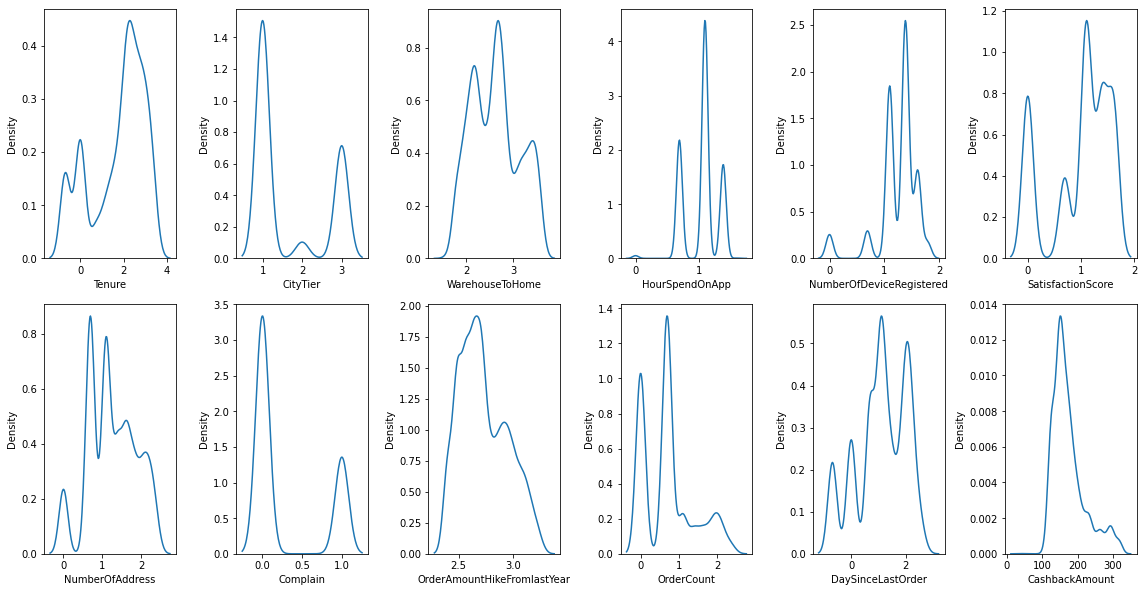

In [296]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_log[num[i]])
    plt.tight_layout()

## Squareroot Transformation

In [297]:
X_train_sqrt = X_train.copy()

# for col in log_col:
#     X_train_sqrt.loc[X_train_sqrt[col] == 0, col] =  X_train_sqrt.loc[X_train_log[col] != 0][col].min()/2

for col in log_col:
    X_train_sqrt[col] = np.sqrt(X_train_sqrt[col])
    


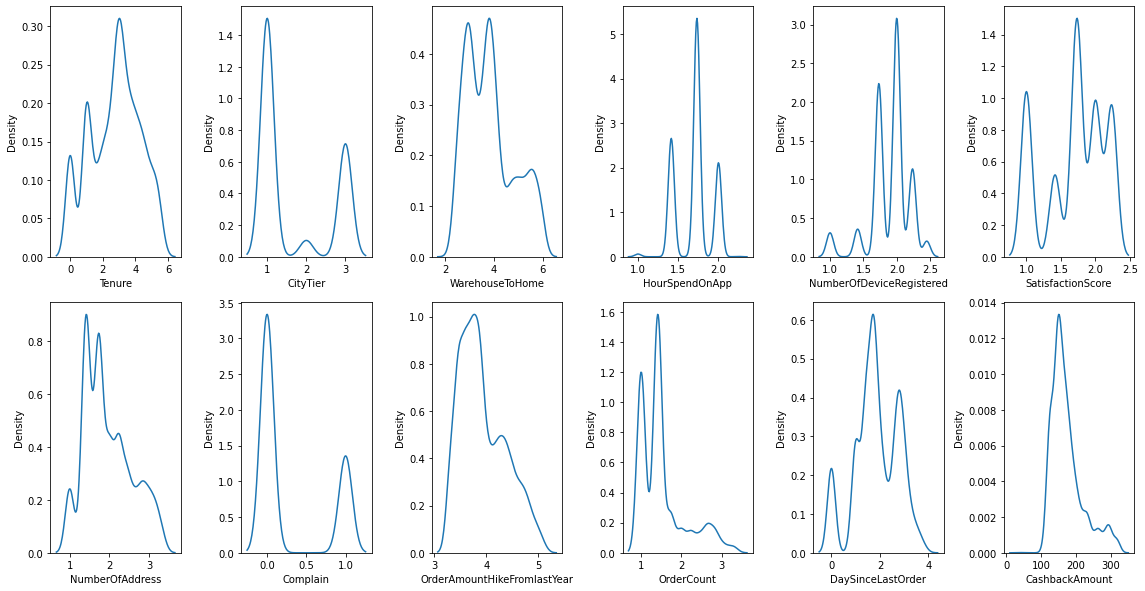

In [298]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_sqrt[num[i]])
    plt.tight_layout()

## Cuberoot Transformation

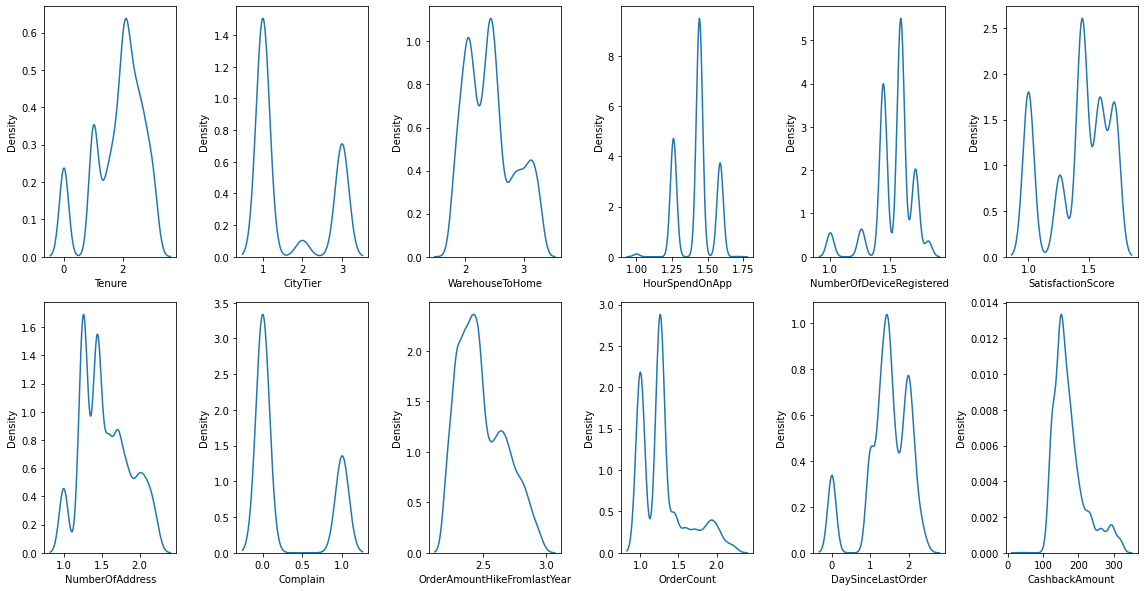

In [299]:
X_train_cbrt = X_train.copy()
for col in log_col:
    X_train_cbrt[col] = np.cbrt(X_train_cbrt[col])
    
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_cbrt[num[i]])
    plt.tight_layout()

# conclusion for transformation

seperti yang dapat kita lihat, boxcox mentransformasi data kita lebih mendekati normal dibanding yang lainnya, karena itu kita akan memilih boxcox sebagai transformasi kita, sekarang kita akan memakai minmaxscaler(normalization) untuk scaling data kita agar memiliki range value yang sama sehingga dapat digunakan pada model yang menghitung jarak seperti logistic regression atau KNN

In [300]:
for col in log_col:
    X_test_transform.loc[X_test_transform[col] == 0, col] =  X_test_transform.loc[X_test_transform[col] != 0][col].min()/2
    
for col in log_col:
    X_test_transform[col] = stats.boxcox(X_test_transform[col])[0]

In [301]:
X_train_transform.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,2.895770,1.658813,1.947806,1.825870,3.670347,1.866724,1.287738,0.288981,0.868042,0.519266,1.429188,174.665161
std,2.153357,0.916206,0.270182,0.639457,1.581298,1.226606,0.645438,0.453342,0.010796,0.414050,1.175618,46.416563
min,-0.614033,1.000000,1.343560,0.000000,0.000000,0.000000,0.000000,0.000000,0.849106,0.000000,-0.634078,37.000000
25%,0.786457,1.000000,1.722127,0.967105,2.537616,0.956375,0.702835,0.000000,0.860245,0.000000,0.759787,145.340000
50%,3.336662,1.000000,1.974628,1.891096,4.102731,1.856200,1.123082,0.000000,0.868298,0.575703,1.272270,161.920000
75%,4.564650,3.000000,2.160435,1.891096,4.102731,2.721162,1.857456,1.000000,0.876894,0.823202,2.535338,191.520000
max,6.743981,3.000000,2.435052,3.665713,7.656851,3.561092,2.516526,1.000000,0.889798,1.327737,3.936375,324.430000


# Feature encoding

In [302]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [303]:
X_train_transform[cat].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,4329,4329,4329,4329,4329
unique,2,5,2,6,3
top,Phone,Debit Card,Male,Laptop & Accessory,Married
freq,3070,1766,2633,1620,2291


PreferedLoginDevice dan Gender akan menggunakan labelEncoder karena hanya memiliki tepat 2 unique value, sedangkan yang lainnya akan memakai OneHotEncoder

In [304]:
X_train_transform['PreferredLoginDevice'].value_counts()

Phone       3070
Computer    1259
Name: PreferredLoginDevice, dtype: int64

In [305]:
X_train_transform['Gender'].value_counts()

Male      2633
Female    1696
Name: Gender, dtype: int64

In [306]:
mappingPLD = {
    'Phone' : 0,
    'Computer' : 1
}

mappingGender = {
    'Male' : 0,
    'Female' : 1
}

X_train_transform['PreferredLoginDevice'] = X_train_transform['PreferredLoginDevice'].map(mappingPLD)
X_train_transform['Gender'] = X_train_transform['Gender'].map(mappingGender)

X_test_transform['PreferredLoginDevice'] = X_test_transform['PreferredLoginDevice'].map(mappingPLD)
X_test_transform['Gender'] = X_test_transform['Gender'].map(mappingGender)

In [307]:
X_train_transform[['PreferredLoginDevice','Gender']].describe()

,PreferredLoginDevice,Gender
count,4329.000000,4329.000000
mean,0.290829,0.391776
std,0.454197,0.488204
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [308]:
X_test_transform[['PreferredLoginDevice','Gender']].describe()

,PreferredLoginDevice,Gender
count,1078.000000,1078.000000
mean,0.285714,0.426716
std,0.451964,0.494830
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [309]:
X_train_transform = pd.get_dummies(X_train_transform)
X_test_transform = pd.get_dummies(X_test_transform)

In [310]:
X_train_transform.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

## Normalization (MinMaxScaler)

In [311]:
X_train_norm = X_train_transform.copy()
X_test_norm = X_test_transform.copy()

for i in X_train_transform.columns:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

In [312]:
X_train_norm

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
4478,0.083451,0.0,0.0,0.500134,1.0,0.515888,0.535825,0.764137,0.446283,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3685,0.749564,0.0,0.0,0.541002,1.0,0.760605,0.759556,0.521245,0.446283,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
731,0.000000,0.0,0.0,0.346835,0.0,0.515888,0.535825,0.521245,0.279288,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
291,0.536924,1.0,0.0,0.281064,0.0,0.263824,0.331418,0.268562,0.279288,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
184,0.327233,0.0,0.0,0.454840,0.0,0.263824,0.331418,0.268562,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.083451,0.0,0.0,0.881135,0.0,0.760605,0.535825,0.521245,0.279288,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,0.568900,0.0,1.0,0.643553,0.0,0.515888,0.535825,0.000000,0.738103,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5226,0.465338,0.0,0.0,0.454840,1.0,0.515888,0.759556,0.764137,0.958397,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5390,0.083451,0.0,0.0,1.000000,0.0,0.760605,0.535825,1.000000,0.446283,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


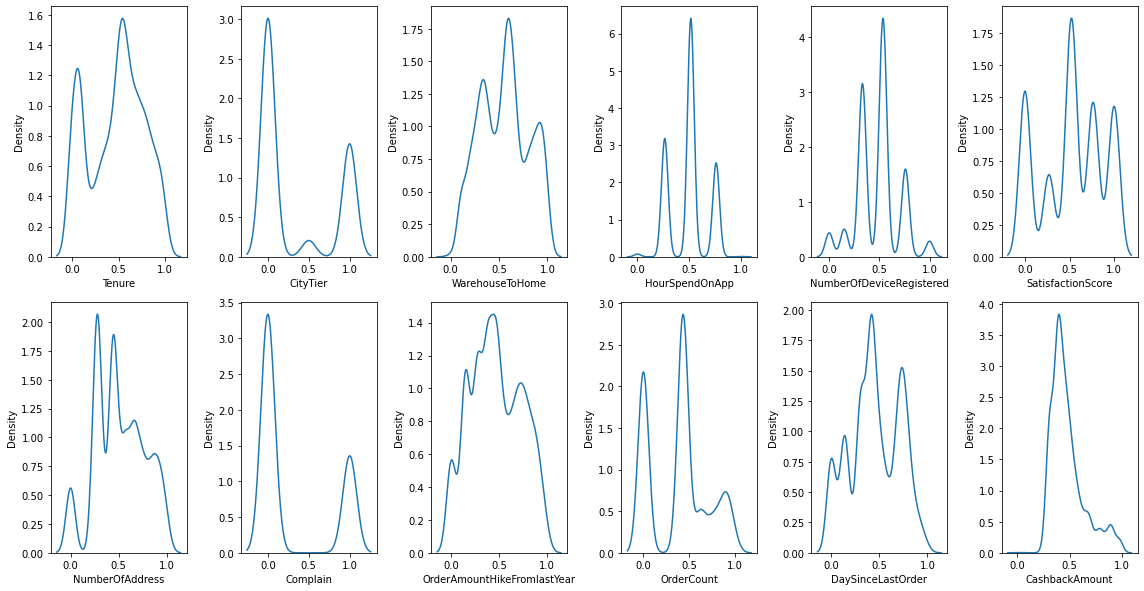

In [313]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_norm[num[i]])
    plt.tight_layout()

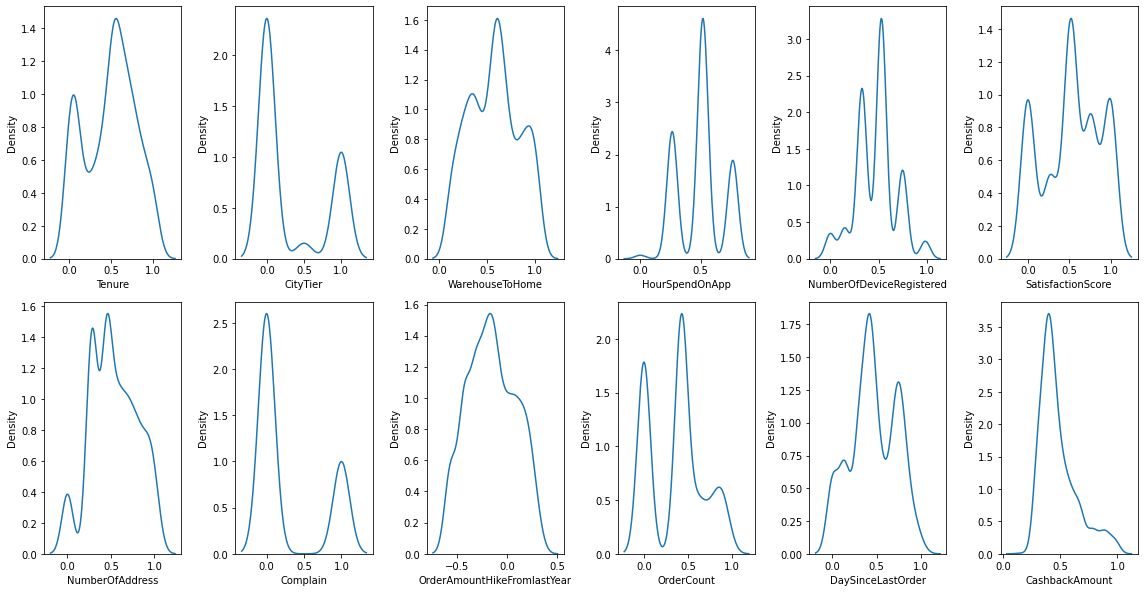

In [314]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_test_norm[num[i]])
    plt.tight_layout()

In [315]:
df_train = X_train_norm.copy()

In [316]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [317]:
df_train['Churn'] = y_train

In [318]:
df_train.isna().sum()

Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrd

In [319]:
df_test = X_test_norm.copy()
df_test['Churn'] = y_test

In [320]:
df_train.to_csv('df_train_2.csv', index = False)
df_test.to_csv('df_test_2.csv', index = False)